# Plant Seedling Classification

In [42]:
#list of useful imports that  I will use
%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image 
import re

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

In [43]:
path = 'Plant_seedling/train'

In [44]:
data = os.listdir(path)

In [45]:
data

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

**Read images and remove missing values save images in images listt**

In [46]:
data

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [47]:
images = []
classes=[]
missing=0
for class_folder_name in os.listdir(path):
    class_folder_path = os.path.join(data, class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_bgr is None: # if the file contain any missig value ignore it
          missing += 1
          continue
        images.append(image_bgr)
        
        classes.append(class_label)

TypeError: expected str, bytes or os.PathLike object, not list

In [48]:
images = [ ]
for i in data:
    #print(i)
    for j in os.listdir(os.path.join(path,i)):
        images.append(os.path.join(path,i,j))

In [49]:
len(images)

4750

In [50]:
labels=[]
for im in images:
    l=re.split(r'[/.\\]',im)
    #print(l)
    labels.append(l[2])

In [51]:
len(labels)

4750

In [54]:
images = images[:500]

In [55]:
classes = labels[:500]

**Resizing images**

In [ ]:
Images= []
for imgs in images:
    #print(row['path'])
    img=image.load_img(imgs,target_size=(256,256))
    img=image.img_to_array(img)
    img=img.astype('float32')
    img=img/255
    #print(obj_image.shape)
    images.append(img)

In [27]:
images = np.array(images)

In [28]:
images.shape

(0,)

## Number of images in each class

In [17]:
#see number of images in each lablel
images = np.array(images)
classes = np.array(classes)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)
#for key,value in images_per_class.items():
   # print("number of {0} images is  -> {1}".format(key, len(value)))
  
for label in set(classes):

  print("number of {} images is  -> {}".format(
        label, 
        len(images[classes == label])))

images shape:  (4750, 256, 256, 3)
classes shape:  (4750,)
number of Sugar beet images is  -> 385
number of Common Chickweed images is  -> 611
number of Shepherds Purse images is  -> 231
number of Cleavers images is  -> 287
number of Small-flowered Cranesbill images is  -> 496
number of Maize images is  -> 221
number of Common wheat images is  -> 221
number of Loose Silky-bent images is  -> 654
number of Scentless Mayweed images is  -> 516
number of Fat Hen images is  -> 475
number of Black-grass images is  -> 263
number of Charlock images is  -> 390


## Distrbution of the images

Text(0.5, 0.98, 'Categorical Plotting')

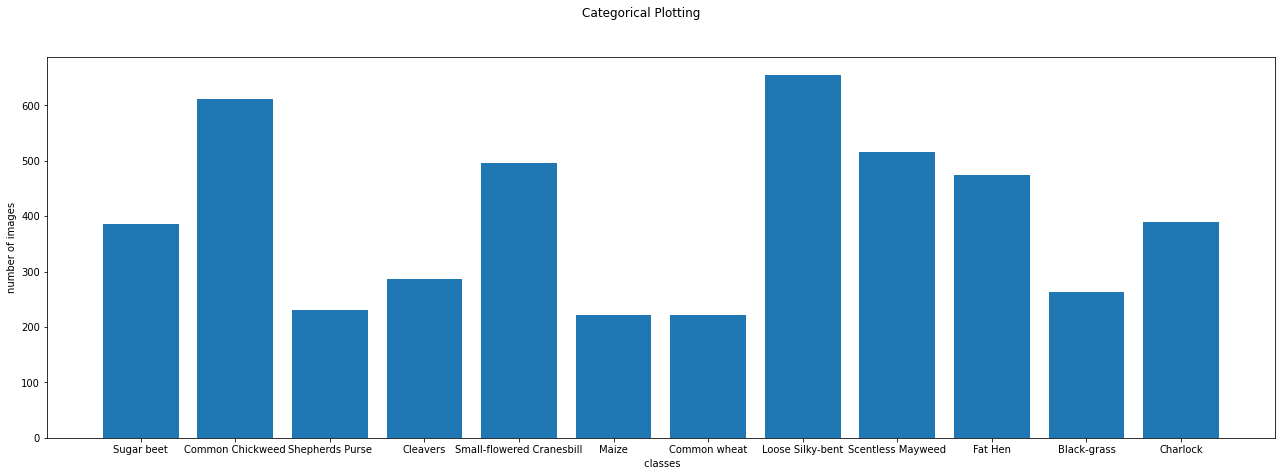

In [18]:
values =[]
labels=[]
for label in set(classes):
  values.append(len(images[classes == label]))
  labels.append(label)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels, values)
ax.set_xlabel(" classes")
ax.set_ylabel("number of images")
#axs[1].scatter(label, )
  #axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

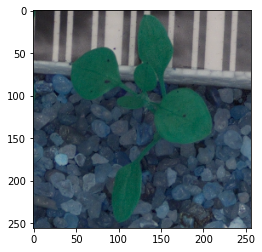

In [19]:
plt.imshow(images[500])

In [20]:
images = np.array(images)

In [21]:
images.shape

(4750, 256, 256, 3)

## Label encoder

In [22]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(classes)

In [23]:
y[0]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

## Spliting data into training and testing 

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=42)

In [25]:
X_train.shape

(3325, 256, 256, 3)

In [26]:
X_test.shape

(1425, 256, 256, 3)

## CNN MODEL

In [28]:
# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,256, 256, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0

In [29]:
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [33]:
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_test,y_test),batch_size = 128)

Epoch 1/20
26/26 [==============================] - 22s 854ms/step - loss: 0.6447 - accuracy: 0.7768 - val_loss: 1.3027 - val_accuracy: 0.5621
Epoch 2/20
26/26 [==============================] - 23s 869ms/step - loss: 0.6486 - accuracy: 0.7768 - val_loss: 0.6025 - val_accuracy: 0.8218
Epoch 3/20
26/26 [==============================] - 22s 853ms/step - loss: 0.6156 - accuracy: 0.7795 - val_loss: 0.6157 - val_accuracy: 0.7853
Epoch 4/20
26/26 [==============================] - 22s 849ms/step - loss: 0.5827 - accuracy: 0.7958 - val_loss: 0.5665 - val_accuracy: 0.8049
Epoch 5/20
26/26 [==============================] - 22s 855ms/step - loss: 0.6522 - accuracy: 0.7747 - val_loss: 0.7487 - val_accuracy: 0.7481
Epoch 6/20
26/26 [==============================] - 22s 857ms/step - loss: 0.5792 - accuracy: 0.7979 - val_loss: 0.6269 - val_accuracy: 0.7874
Epoch 7/20
26/26 [==============================] - 22s 854ms/step - loss: 0.6097 - accuracy: 0.7901 - val_loss: 0.6163 - val_accuracy: 0.8105

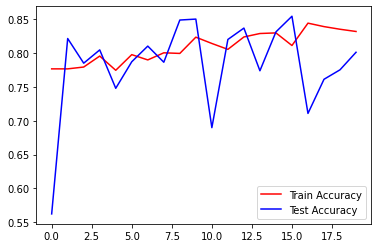

In [43]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

In [38]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test loss: 0.6114797592163086
Test accuracy: 0.8014035224914551


In [70]:
import pandas as pd
results1 = pd.DataFrame(columns=['model', 'Test-Accuracy' ])
new = ['CNN ',0.8014]
results1.loc[0] = new

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


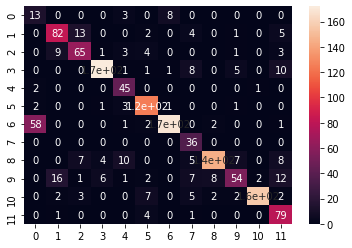

In [34]:
from sklearn.metrics import confusion_matrix
cm=sns.heatmap(confusion_matrix(model.predict_classes(X_test),np.argmax(y_test,axis=1)),annot=True)

## VGG_16 Model


In [27]:
from keras.applications.vgg16 import VGG16


In [28]:
vgg=VGG16(weights='imagenet',include_top=False,input_shape=(256,256,3))

58892288/58889256 [==============================] - 0s 0us/step


In [29]:
vgg.trainable=False

In [30]:
model_1=Sequential()
model_1.add(vgg)
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(12, activation='softmax'))

In [31]:
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model_1.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [32]:
History_1 = model_1.fit(X_train, y_train, epochs = 20, validation_data = (X_test,y_test),batch_size = 64)

Epoch 1/20
52/52 [==============================] - 22s 432ms/step - loss: 11.8238 - accuracy: 0.3194 - val_loss: 1.9652 - val_accuracy: 0.4218
Epoch 2/20
52/52 [==============================] - 20s 382ms/step - loss: 1.9525 - accuracy: 0.4710 - val_loss: 1.4494 - val_accuracy: 0.5867
Epoch 3/20
52/52 [==============================] - 20s 391ms/step - loss: 1.3497 - accuracy: 0.6391 - val_loss: 1.5372 - val_accuracy: 0.6021
Epoch 4/20
52/52 [==============================] - 20s 394ms/step - loss: 0.9359 - accuracy: 0.7459 - val_loss: 1.0610 - val_accuracy: 0.7467
Epoch 5/20
52/52 [==============================] - 21s 403ms/step - loss: 0.7405 - accuracy: 0.8003 - val_loss: 0.9323 - val_accuracy: 0.7712
Epoch 6/20
52/52 [==============================] - 21s 412ms/step - loss: 0.6437 - accuracy: 0.8250 - val_loss: 1.2371 - val_accuracy: 0.7453
Epoch 7/20
52/52 [==============================] - 22s 419ms/step - loss: 0.6004 - accuracy: 0.8538 - val_loss: 1.0538 - val_accuracy: 0.775

In [33]:
score = model_1.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8070175647735596


In [71]:
new = ['VGG16 ',0.8070]
results1.loc[1] = new

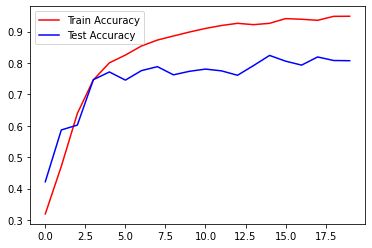

In [68]:
plt.plot(History_1.history['accuracy'], 'r')
plt.plot(History_1.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

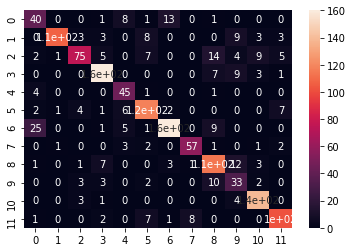

In [69]:
from sklearn.metrics import confusion_matrix
cm=sns.heatmap(confusion_matrix(model_1.predict_classes(X_test),np.argmax(y_test,axis=1)),annot=True)

## Performance Table

In [72]:
results1

,model,Test-Accuracy
0,CNN,0.8014
1,VGG16,0.8070
